# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [40]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [41]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 4.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

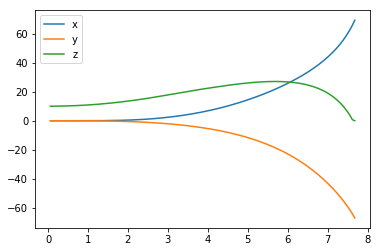

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

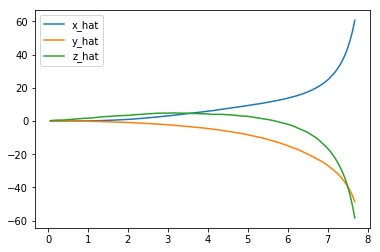

In [43]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

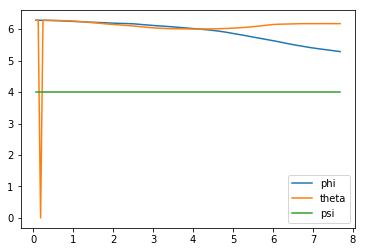

In [44]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

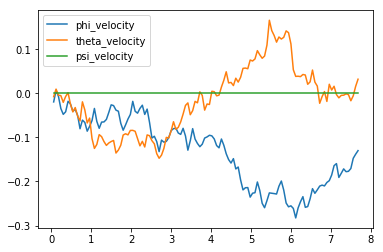

In [45]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

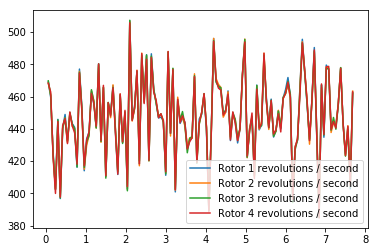

In [46]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [47]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 69.27132741 -66.97697587   0.           5.28708504   6.17506783   4.        ]
[ 60.70042743 -48.63863183 -58.39179543]
[-0.12994726  0.03219731  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [48]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0.,58.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   0.607 (best =   0.617), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [59]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 1000
init_pose = np.array([0., 0., 1.,0.,0.,0.])
#init_velocities = np.array([0., 0., 500.])
target_pos = np.array([0., 0., 58.])
graph = np.zeros((1001))
task = Task(init_pose=init_pose,target_pos=target_pos,init_velocities=init_velocities)
agent = DDPG(task) 
reward_total = 0
counter = 0
best_score = -5

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state, done)
        state = next_state
        reward_total=reward_total + reward
        counter = counter + 1
        if reward>=0.98:
            print("Height: ")
            print(next_state[2])
        if done:
            print("\rEpisode = {:4d}, score = (best = {:7.3f}), reward = ".format(
                i_episode, best_score), end="")  # [debug]
            reward_total = reward_total/counter
            print(reward_total)
            if reward_total>best_score:
                best_score = reward_total
            if reward_total!=-5:
                graph[i_episode] = reward_total
            reward_total = 0
            counter = 0
            
            break
    sys.stdout.flush()

Episode =    1, score = (best =  -5.000), reward = 0.560537343411
Episode =    2, score = (best =   0.561), reward = 0.5605428863
Episode =    3, score = (best =   0.561), reward = 0.56053623985
Episode =    4, score = (best =   0.561), reward = 0.560524015865
Episode =    5, score = (best =   0.561), reward = 0.560535341568
Episode =    6, score = (best =   0.561), reward = 0.560538567398
Episode =    7, score = (best =   0.561), reward = 0.560538540918
Episode =    8, score = (best =   0.561), reward = 0.560536147658
Episode =    9, score = (best =   0.561), reward = 0.56053403651
Episode =   10, score = (best =   0.561), reward = 0.560468835143
Episode =   11, score = (best =   0.561), reward = 0.559698091994
Episode =   12, score = (best =   0.561), reward = 0.560840430888
Episode =   13, score = (best =   0.561), reward = 0.585547117821
Height: 
56.5795819428
Height: 
57.4564307228
Height: 
58.3224396469
Episode =   14, score = (best =   0.586), reward = 0.79075525745
Height: 
56.

Episode =   86, score = (best =   0.819), reward = 0.560259576873
Episode =   87, score = (best =   0.819), reward = 0.560237151271
Episode =   88, score = (best =   0.819), reward = 0.560202542213
Episode =   89, score = (best =   0.819), reward = 0.560251595944
Episode =   90, score = (best =   0.819), reward = 0.56022363327
Episode =   91, score = (best =   0.819), reward = 0.55977712009
Episode =   92, score = (best =   0.819), reward = 0.559813383016
Episode =   93, score = (best =   0.819), reward = 0.560199663593
Episode =   94, score = (best =   0.819), reward = 0.560263777776
Episode =   95, score = (best =   0.819), reward = 0.56024565968
Episode =   96, score = (best =   0.819), reward = 0.559806773139
Episode =   97, score = (best =   0.819), reward = 0.560221642741
Episode =   98, score = (best =   0.819), reward = 0.560239789531
Episode =   99, score = (best =   0.819), reward = 0.560242570977
Episode =  100, score = (best =   0.819), reward = 0.560249188821
Episode =  10

Episode =  211, score = (best =   0.819), reward = 0.560209924809
Episode =  212, score = (best =   0.819), reward = 0.560197412535
Episode =  213, score = (best =   0.819), reward = 0.560259686486
Episode =  214, score = (best =   0.819), reward = 0.560257010044
Episode =  215, score = (best =   0.819), reward = 0.559791317614
Episode =  216, score = (best =   0.819), reward = 0.560253256434
Episode =  217, score = (best =   0.819), reward = 0.560240468122
Episode =  218, score = (best =   0.819), reward = 0.560245926786
Episode =  219, score = (best =   0.819), reward = 0.560210523438
Episode =  220, score = (best =   0.819), reward = 0.560268310083
Episode =  221, score = (best =   0.819), reward = 0.559765454133
Episode =  222, score = (best =   0.819), reward = 0.560257693998
Episode =  223, score = (best =   0.819), reward = 0.559749267581
Episode =  224, score = (best =   0.819), reward = 0.559790257166
Episode =  225, score = (best =   0.819), reward = 0.560251842387
Episode = 

Episode =  336, score = (best =   0.819), reward = 0.559855563947
Episode =  337, score = (best =   0.819), reward = 0.560205488073
Episode =  338, score = (best =   0.819), reward = 0.560213704698
Episode =  339, score = (best =   0.819), reward = 0.560240495979
Episode =  340, score = (best =   0.819), reward = 0.560252050669
Episode =  341, score = (best =   0.819), reward = 0.559772951144
Episode =  342, score = (best =   0.819), reward = 0.56023913256
Episode =  343, score = (best =   0.819), reward = 0.560254381437
Episode =  344, score = (best =   0.819), reward = 0.559806366749
Episode =  345, score = (best =   0.819), reward = 0.559851500113
Episode =  346, score = (best =   0.819), reward = 0.560239043004
Episode =  347, score = (best =   0.819), reward = 0.559832098361
Episode =  348, score = (best =   0.819), reward = 0.560229428121
Episode =  349, score = (best =   0.819), reward = 0.560266561333
Episode =  350, score = (best =   0.819), reward = 0.559750258993
Episode =  

Episode =  461, score = (best =   0.819), reward = 0.559772265942
Episode =  462, score = (best =   0.819), reward = 0.560204595592
Episode =  463, score = (best =   0.819), reward = 0.560220204286
Episode =  464, score = (best =   0.819), reward = 0.560216665896
Episode =  465, score = (best =   0.819), reward = 0.560272396723
Episode =  466, score = (best =   0.819), reward = 0.560268660089
Episode =  467, score = (best =   0.819), reward = 0.56023469198
Episode =  468, score = (best =   0.819), reward = 0.559836859507
Episode =  469, score = (best =   0.819), reward = 0.559783517421
Episode =  470, score = (best =   0.819), reward = 0.55981953576
Episode =  471, score = (best =   0.819), reward = 0.560240866069
Episode =  472, score = (best =   0.819), reward = 0.559839847994
Episode =  473, score = (best =   0.819), reward = 0.559768915507
Episode =  474, score = (best =   0.819), reward = 0.560258425627
Episode =  475, score = (best =   0.819), reward = 0.55978974269
Episode =  47

Episode =  586, score = (best =   0.819), reward = 0.55976512454
Episode =  587, score = (best =   0.819), reward = 0.560212661455
Episode =  588, score = (best =   0.819), reward = 0.559797742628
Episode =  589, score = (best =   0.819), reward = 0.559748480662
Episode =  590, score = (best =   0.819), reward = 0.56021723043
Episode =  591, score = (best =   0.819), reward = 0.560167186371
Episode =  592, score = (best =   0.819), reward = 0.559750432634
Episode =  593, score = (best =   0.819), reward = 0.55974962193
Episode =  594, score = (best =   0.819), reward = 0.559840245145
Episode =  595, score = (best =   0.819), reward = 0.560261112077
Episode =  596, score = (best =   0.819), reward = 0.560246786128
Episode =  597, score = (best =   0.819), reward = 0.559763537622
Episode =  598, score = (best =   0.819), reward = 0.56020759269
Episode =  599, score = (best =   0.819), reward = 0.559747643357
Episode =  600, score = (best =   0.819), reward = 0.559752435477
Episode =  601

Episode =  711, score = (best =   0.819), reward = 0.559788791683
Episode =  712, score = (best =   0.819), reward = 0.559793698399
Episode =  713, score = (best =   0.819), reward = 0.559831031817
Episode =  714, score = (best =   0.819), reward = 0.560218557004
Episode =  715, score = (best =   0.819), reward = 0.560245146445
Episode =  716, score = (best =   0.819), reward = 0.559854542302
Episode =  717, score = (best =   0.819), reward = 0.560193216248
Episode =  718, score = (best =   0.819), reward = 0.559752898394
Episode =  719, score = (best =   0.819), reward = 0.55981729762
Episode =  720, score = (best =   0.819), reward = 0.560243124333
Episode =  721, score = (best =   0.819), reward = 0.56022879119
Episode =  722, score = (best =   0.819), reward = 0.5597466438
Episode =  723, score = (best =   0.819), reward = 0.559751371504
Episode =  724, score = (best =   0.819), reward = 0.560249049108
Episode =  725, score = (best =   0.819), reward = 0.559791459911
Episode =  726

Episode =  836, score = (best =   0.819), reward = 0.560172090451
Episode =  837, score = (best =   0.819), reward = 0.560231418968
Episode =  838, score = (best =   0.819), reward = 0.56021253978
Episode =  839, score = (best =   0.819), reward = 0.559784031262
Episode =  840, score = (best =   0.819), reward = 0.559755781584
Episode =  841, score = (best =   0.819), reward = 0.559810335553
Episode =  842, score = (best =   0.819), reward = 0.560209929754
Episode =  843, score = (best =   0.819), reward = 0.560204029914
Episode =  844, score = (best =   0.819), reward = 0.559754538721
Episode =  845, score = (best =   0.819), reward = 0.559796597626
Episode =  846, score = (best =   0.819), reward = 0.559754173208
Episode =  847, score = (best =   0.819), reward = 0.559809123893
Episode =  848, score = (best =   0.819), reward = 0.560259015031
Episode =  849, score = (best =   0.819), reward = 0.559900118642
Episode =  850, score = (best =   0.819), reward = 0.560254101442
Episode =  

Episode =  961, score = (best =   0.819), reward = 0.559784851752
Episode =  962, score = (best =   0.819), reward = 0.560201010404
Episode =  963, score = (best =   0.819), reward = 0.559752488968
Episode =  964, score = (best =   0.819), reward = 0.560235877144
Episode =  965, score = (best =   0.819), reward = 0.560248253104
Episode =  966, score = (best =   0.819), reward = 0.560241776072
Episode =  967, score = (best =   0.819), reward = 0.560214320622
Episode =  968, score = (best =   0.819), reward = 0.559811965276
Episode =  969, score = (best =   0.819), reward = 0.560263145334
Episode =  970, score = (best =   0.819), reward = 0.560211145846
Episode =  971, score = (best =   0.819), reward = 0.560246279561
Episode =  972, score = (best =   0.819), reward = 0.559796987539
Episode =  973, score = (best =   0.819), reward = 0.560211564892
Episode =  974, score = (best =   0.819), reward = 0.559801397731
Episode =  975, score = (best =   0.819), reward = 0.560263833481
Episode = 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

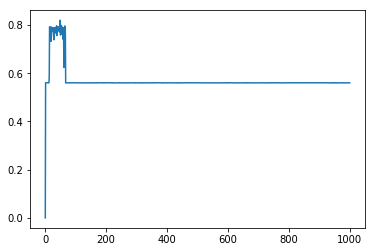

In [60]:
## TODO: Plot the rewards.
plt.plot(graph)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I designed the reward function to return a total reward between -1 and 2 if it reached the position on the Z axis over the 3 iterations. If it reached more than 98.7% the target position in the Z axis, I awarded 0.3333333333 more for that iteration to be marked as reached.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 
- I really just tried the actor critic method since it is suitable for this project, given the continuous inputs and continuous outputs for the task. 
- I tried many different combinations of theta and sigma to make my exploration better with a little bit of more noise. At last what worked best for me was theta=0.2 and sigma=0.4.
- For the Actor I used the following structure:
    - 32 nodes in the first layer with RelU activation function
    - 64 nodes in the second layer with RelU activation function and L2 Regularization
    - Dropout layer of 40% to prevent overfitting
    - 128 nodes in the second layer with RelU activation function and L2 Regularization
    - Dropout layer of 40% to prevent overfitting
    - 256 nodes in the second layer with RelU activation function and L2 Regularization
- For the Critic I used the following structure:
    - 32 nodes in the first layer with RelU activation function
    - 64 nodes in the second layer with RelU activation function and L2 Regularization
    - Dropout layer of 40% to prevent overfitting
    - 128 nodes in the second layer with RelU activation function and L2 Regularization
    - Dropout layer of 40% to prevent overfitting
    - 256 nodes in the second layer with RelU activation function and L2 Regularization
    - Dropout layer of 40% to prevent overfitting

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: 
- It was an easy task to learn because the reward reached a very high point at first but stayed at local minima later.
- There was a sudden learning curve after the first episodes and fell after some episodes.
- The last 10 episodes were really bad, I'm thinking that it has to do with the learning rate or replay buffer.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- I think the hardest part of the project was where to start. I was really amazed at how everything I learned in this course was necessary to finish this project.
- It is really interesting to me that if I use a lower value for the learning rate it seems to stay at a local minima. I noticed this when I used 0.001 and 0.0001. I finished using a learning rate of 0.001 which works good but stays at local minima after achieving a high reward.
- My agent also started working better when I increased the replay buffer batch size. I learned that from the video in this chapter and it really explains it quite well.
- For me this was the most challenging project I worked on in my life, I'm glad Udacity makes us complete this project because it makes us review everything that we've learned in order to complete it.
- I would recommend developing the actor critic method a little more since this was difficult for me to understand. Siraj has a really good video on YouTube explaining it and it made everything more clear to me.